This project began as a result of being assigned Equatorial Guinea for a school project in a geography class. The data analysis was not part of the project, it was just an extension of existing interest in the country sparked by it. Looking online for data regarding Equatorial Guinea, one dataset that seemed interesting was a dataset of <a href="https://data.world/datainspace/nighttime-luminosity-africa">nighttime luminosity in Africa</a>, but the dataset did not include much data regarding Equatorial Guinea, so I decided to collect some myself.

I used NASA's GIBS to collect data about nighttime luminosity, searching for only tiles that contained the longitude and latitude coordinates of the 10 largest cities in Equatorial Guinea (Bata, Malabo, Ebebiyín, Aconibe, Añisoc, Luba, Evaniyong, Mongomo, Mengomeyén, and Micomeseng). I then used their coordinates and the minimum and maximum coordinates included in the tile that they are in to calculate their approximate pixel position in the image, then used NumPy to change the pixel coordinates by a random, small amount, in order to not measure the same pixel each time.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

In [16]:
df = pd.read_csv("data.csv")
names = df.columns.to_list()
names.remove("Date")
dates = df.loc[:, "Date"].to_list()
dates = np.asarray(dates, dtype='datetime64[s]')

C:\Users\nicoc\AppData\Local\Temp\ipykernel_14200\2004528038.py:7: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(nbins=12)


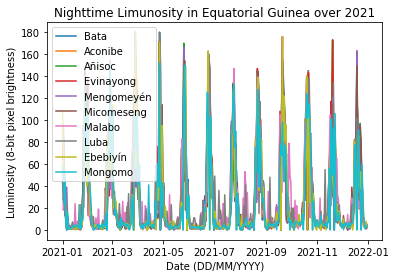

In [17]:
for name in names:
    plt.plot(dates, df.loc[:, name].to_list(), label=name)
plt.xlabel('Date (DD/MM/YYYY)')
plt.ylabel('Luminosity (8-bit pixel brightness)')
plt.title('Nighttime Limunosity in Equatorial Guinea over 2021')
plt.legend()
plt.locator_params(nbins=12)
#ax = plt.gca()
#ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator(range(365)))
#ax.set_xticklabels(labels=dates, rotation=60)
plt.show()

In [25]:
ranks = []
for name in names:
    temp = df.loc[:, name].to_list()
    mean = sum(temp)/len(temp)
    ranks.append((-mean, name))
ranks.sort()
ranks = [(f'{-mean:.3f}', name) for (mean, name) in ranks]
for item in ranks:
    print(f'{item}\n')

('25.732', 'Añisoc')

('25.652', 'Mengomeyén')

('25.403', 'Aconibe')

('25.389', 'Evinayong')

('25.211', 'Malabo')

('25.112', 'Micomeseng')

('25.022', 'Bata')

('24.970', 'Luba')

('24.003', 'Ebebiyín')

('23.677', 'Mongomo')



Interestingly, the above rankings (which track average nighttime luminosity across the year) appear to be mostly random, and not at all indicative of population, with the most luminous apparently being Añisoc, which is significantly less populated than the most populous city of Bata, and the capital of Malabo. It seems as if this data is not properly equipped to handle comparisons between cities, as I had initially intended to be.